## Exercise 1a): Matplotlib advanced features: inset plots

This execise demonstrates adding inset plots to an axes.

The main axes and inset axes are instatiated as separate objects which are plotted on the same Figure. Each axes requires individual setup.

The main axes and inset axes are linked through `mark_inset`, which is a sub function of `mpl_tookits`.

Try changing which section of the main plot the inset captures, and moving the position of the inset

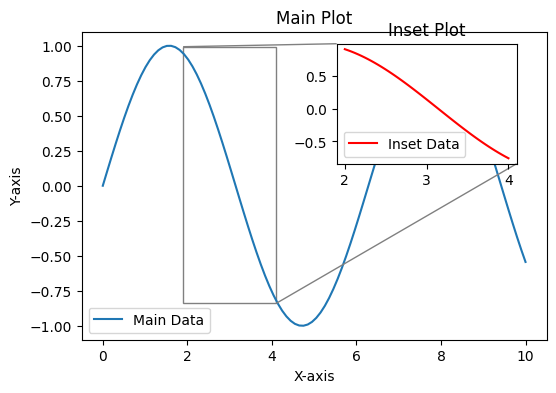

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Create a figure and main axes
fig, main_ax = plt.subplots(figsize=(6, 4))

# Add inset axes
inset_ax = fig.add_axes([0.55, 0.55, 0.3, 0.3])

# Data for main plot
x_main = np.linspace(0, 10, 100)
y_main = np.sin(x_main)

# Data for inset plot (highlight a specific region of the main data)
x_inset = np.linspace(2, 4, 50)
y_inset = np.sin(x_inset)

# Plot data on main axes
main_ax.plot(x_main, y_main, label="Main Data")
main_ax.set_title("Main Plot")
main_ax.set_xlabel("X-axis")
main_ax.set_ylabel("Y-axis")
main_ax.legend()

# Plot data on inset axes
inset_ax.plot(x_inset, y_inset, color="red", label="Inset Data")
inset_ax.set_title("Inset Plot")
inset_ax.legend()

# Highlight the inset area on the main plot

mark_inset(main_ax, inset_ax, loc1=2, loc2=4, fc="none", ec="0.5")

# Display the plot
plt.show()

# Exercise 1b) Custom date time axes formats

Its common to plot time series data using Matplotlib. This section explores the default date formatter and shows alternatives which may be more readable.

This section also introduces `subplots` which are a common way of adding multiple axes to a `figure` in a structured fashion.

`axs` is a structure containing all the subplots. This is looped over to update each subplot in a consistent way. This minimises the amount of repeated code.

This exercise demonstataes how to manaually define x-axis data labels, and how display of time series data is improved with manual intervention. 

In [ ]:
import matplotlib.dates as mdates
from matplotlib import cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
data = cbook.get_sample_data("goog.npz")["price_data"]

# note use of subplots
fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout="constrained")

# common to all three:
for ax in axs:
    ax.plot("date", "adj_close", data=data)
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel(r"Price [\$]")

# define unique settings for each subplot:
ax = axs[0]
ax.set_title("DefaultFormatter", loc="left", y=0.85, x=0.02, fontsize="medium")

ax = axs[1]
ax.set_title("ConciseFormatter", loc="left", y=0.85, x=0.02, fontsize="medium")
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax = axs[2]
ax.set_title("Manual DateFormatter", loc="left", y=0.85, x=0.02, fontsize="medium")


# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))


# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which="major"):
    label.set(rotation=30, horizontalalignment="right")

plt.show()

## Exercise 1c) Annotating plots

It can be useful to highlight specific data areas or add commentry. Matplotlib supports a subset of `latex` which can be used to display mathematics or text.

Try moving the annotations and modifying their content.

In [ ]:
# Create a figure
fig, main_ax = plt.subplots(figsize=(6, 4))

# Data for main plot
x_main = np.linspace(0, 10, 100)
y_main = np.sin(x_main)

# Plot data on main axes
main_ax.plot(x_main, y_main, label="Main Data")
main_ax.set_title("Main Plot")
main_ax.set_xlabel("X-axis")
main_ax.set_ylabel("Y-axis")
main_ax.legend()

# Add the first annotation
main_ax.annotate(
    "Peak",
    xy=(np.pi / 2, 1),
    xytext=(4, 0.5),
    arrowprops={"facecolor": "black", "shrink": 0.05},
)

# Add the second annotation
main_ax.annotate(
    "y = Sin(x)",
    xy=(3 * np.pi / 2, -1),
    xytext=(4, 0),
    arrowprops={"facecolor": "red", "shrink": 0.05},
)

# Display the plot
plt.show()

## Exercise 2a) Plotting NetCDF data

NetCDF data needs to be processed before it can be plotted effectively in matplotlib.

The first codebox simply displays the NetCDF data we are going to plot. Find the following:
- source 
- temporal range
- extents of longitude and latitude
- variables

In [ ]:
import netCDF4 as nc

# Open the NetCDF file
file_path = "../data/MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4"
dataset = nc.Dataset(file_path)

# Print metadata
print(dataset)

# Close the dataset
dataset.close()

## Exercise 2b) Plot the netCDF data

Try changing the colour scheme or changing the plot to focus on a smaller region of the earth

For this exercise we will be using `dataset` as loaded above.

In [ ]:
# Load the netCDF file
file_path = "../data/MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4"
dataset = nc.Dataset(file_path)

# Extract the variables
lats = dataset.variables["lat"][:]
lons = dataset.variables["lon"][:]
temps = dataset.variables["TSURF"][
    0, :, :
]  # Assuming the time dimension is the first dimension

# Close the dataset
dataset.close()

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature data
c = ax.pcolormesh(lons, lats, temps, shading="auto")
fig.colorbar(c, ax=ax, label="Temperature")

# Set labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Surface Temperature Distribution")

plt.show()

## Excercise 3a) Cartopy coastlines

Cartopy is a wrapper for Matplotlib. It extends Matplotlib functionality
by adding additional features that can be invoked through the conventional
Matplotlib interface.

The trigger for activation of Cartopy features is the addition of the `projection = ccrs.X` argument in the creation of the plot object.

Once the projection map is defined on the `axes`, coastlines can be added with the command `ax.coastlines()`


In [ ]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

## Exercise 3b) Cartopy features

`stock_img` is an internal Matplotlib standard image.
Currently, the only (and default) option is a downsampled version of the Natural Earth shaded relief raster.

You may notice that we use a new command `ax.set_extent`. This is an extension of the conventional `matplotlib` command `ax.set_xlim`, and is better able to work with geomgraphic data such as latitude and longitude, and non cartesian axes. 

The cartopy `Feature` interface provides Cartopy resources that can be invoked in a consistent way.

`cartopy.feature.BORDERS` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Country boundaries\
`cartopy.feature.COASTLINE` &nbsp;&nbsp;Coastline, including major islands.\
`cartopy.feature.LAKES` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Natural and artificial lakes.\
`cartopy.feature.LAND` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Land polygons, including major islands.\
`cartopy.feature.OCEAN`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ocean polygons.\
`cartopy.feature.RIVERS`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Single-line drainages, including lake centerlines.\

The `ax.add_feature` command takes Cartopy `Features` as arguments and adds them to the plot axes.

This example uses the `Matplotlib` library `AnchoredText` within `offsetbox` to add further information to the plot. The `axes` attribute `add_artist` is used to directly add the `AnchoredText` to the plot. This is added last as it is layered on top of the prior features.

In [ ]:
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30])

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category="cultural",
    name="admin_1_states_provinces_lines",
    scale="50m",
    facecolor="none",
)

SOURCE = "Natural Earth"
LICENSE = "public domain"

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor="gray")

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText(
    "\u00a9 {}; license: {}" "".format(SOURCE, LICENSE),
    loc=4,
    prop={"size": 8},
    frameon=True,
)
ax.add_artist(text)

plt.show()

## Exercise 4a) Cartopy projections

`netCDF4` is a useful library for importing, parseinga nd saving netCDF files.

`pcolormesh` is a matplotlib library for plotting pseudocolour data on non-regular rectanglar grids.

Try:
- rotating the plot
- changing the projection (https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)
- changing the colourmap

In [ ]:
# Open the NetCDF file
file_path = "../data/MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4"
dataset = nc.Dataset(file_path)

# Extract the variables
lats = dataset.variables["lat"][:]
lons = dataset.variables["lon"][:]
temps = dataset.variables["TSURF"][
    0, :, :
]  # Assuming the time dimension is the first dimension

# Close the dataset
dataset.close()

# Create a figure
fig, ax = plt.subplots(
    figsize=(12, 6),
    subplot_kw={
        "projection": ccrs.Orthographic(central_longitude=0, central_latitude=50)
    },
)

# Plot the temperature data
c = ax.pcolormesh(
    lons, lats, temps, shading="auto", transform=ccrs.PlateCarree(), cmap="coolwarm"
)
fig.colorbar(c, ax=ax, label="Temperature")

# Add features for better visualization
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE)

# Set title
ax.set_title("Surface Temperature Distribution")

plt.show()

## Exercise 4b) Cartopy gridlines and ticks

In this exercise we add both gridlines and specific labelled lcoations on the x-axis.

The `matplotlib.ticker` library is used to define a custom set of x-axis labels at the correct longitude position.

The `cartopy.mpl.ticker` library is used to format the latitude and longitudes correctly, so that these custom labels appear on the plot correctly.

The y-axis labels are default from the `draw_labels = True` argument to `ax.gridlines`.

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LatitudeFormatter, LatitudeLocator, LongitudeFormatter

ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color="gray",
    alpha=0.5,
    linestyle="--",
)
gl.top_labels = False
gl.left_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {"size": 15, "color": "gray"}
gl.xlabel_style = {"color": "red", "weight": "bold"}

plt.show()

## Exercise 5) Visualising vector data as streamlines

Up until now we have been displaying scalar temeprature data. However, different approaches can be used for vector data to communicate the magnitude and angle associated with the data.

Many climate datasets will store wind velocity data as `u` annd `v` orthogonal components. These can be converted to a magnitude and direction, and then streamlines can be used to visualise these for a geographical area.

`streamplot` is a `matplotlib` library that takes corordinate data and vector components and convertes these to streamlines. The vector magnitudes can be used to colour the steamlines.

This code outputs a streamline plot in `Orthographic` projection. The display projection is set when we create the axes using the command `ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=50))`. This centres the plot on the (0, 50) co-ordinate which is roughly Cambridge.

Later, when we compute the streamlines, we use the `transform=ccrs.PlateCarree()` argument. The data we use to calculate the streamlines is in basic lat/lon format, therefore computing on a rectangular grid is the simplest computational approach. The results are then mapped back to the orthographic projection.

Try changing:
- projection type
- plot centre
- streamline size and density
- streamline colour


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm
from matplotlib.colors import Normalize

# Open the NetCDF file
dataset = xr.load_dataset("../data/ERA5_vector_data.nc", engine="netcdf4")

# Extract the variables
u = dataset.variables["u10"][0, :, :].values  # U-component of wind
v = dataset.variables["v10"][0, :, :].values  # V-component of wind
lats = dataset.variables["latitude"][:].values
lons = dataset.variables["longitude"][:].values

# Close the dataset
dataset.close()

# Calculate the magnitude of the wind vectors
magnitude = (u**2 + v**2) ** 0.5

# Normalize the magnitude for coloring
norm = Normalize(vmin=np.min(magnitude), vmax=np.max(magnitude))
cmap = cm.viridis

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=50))

# Create the streamlines with color mapping based on magnitude
strm = ax.streamplot(
    lons,
    lats,
    u,
    v,
    transform=ccrs.PlateCarree(),
    color=magnitude,
    linewidth=1,
    cmap=cmap,
    norm=norm,
    density=1.5,
)

# Add color to the land and sea
land = cfeature.NaturalEarthFeature(
    "physical", "land", "110m", edgecolor="face", facecolor=cfeature.COLORS["land"]
)
ax.add_feature(land)

sea = cfeature.NaturalEarthFeature(
    "physical", "ocean", "110m", edgecolor="face", facecolor=cfeature.COLORS["water"]
)
ax.add_feature(sea)

# Add coastlines
ax.coastlines(color="r", linewidth=1)

# Add a color bar with adjusted size
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(magnitude)
plt.colorbar(
    sm, ax=ax, orientation="horizontal", label="Wind Speed (m/s)", shrink=0.5, pad=0.1
)

plt.show()

## Exercise 6) Visualising data as animations

Previously we have been only plotting steady state data. Not we will look at plotting timeseries data as animations.

`matplotlib.animation` contains a set of methods used for computing animations:

- `matplotlib.animation.animation`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;base class for Animations.\
- `matplotlib.animation.FuncAnimation`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;subclass that creates an animation by repeatedly calling a function `func`\
- `matplotlib.animation.ArtistAnimation`&nbsp;&nbsp;&nbsp; subclass that cerates an animation by using a fixed set of artist objects

In this case we use `matplotlib.animation.FuncAnimation` to call a function which updates each frame with timeseries data.

We convert the animation object to html for plotting.

In [ ]:
from IPython import display
from matplotlib import animation
from matplotlib.colors import Normalize

# Open the NetCDF file
dataset = xr.load_dataset("../data/ERA5_vector_data.nc", engine="netcdf4")

# Define the latitude and longitude bounds for the UK and Ireland
lat_bounds = [49, 61]
lon_bounds = [-12, 4]

# Extract latitude and longitude arrays
lats = dataset.variables["latitude"][:].values
lons = dataset.variables["longitude"][:].values

# Convert longitudes from [0, 360] to [-180, 180]
lons = np.where(lons > 180, lons - 360, lons)

# Find the indices that correspond to the desired lat/lon bounds
lat_indices = np.where((lats >= lat_bounds[0]) & (lats <= lat_bounds[1]))[0]
lon_indices = np.where((lons >= lon_bounds[0]) & (lons <= lon_bounds[1]))[0]

# Slice the data to include only these bounds
u = dataset.variables["u10"][:, lat_indices, :][:, :, lon_indices].values
v = dataset.variables["v10"][:, lat_indices, :][:, :, lon_indices].values
lats = lats[lat_indices]
lons = lons[lon_indices]

# Set up the plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-12, 4, 49, 61], crs=ccrs.PlateCarree())  # Focus on UK and Ireland

# Add color to the land and sea
land = cfeature.NaturalEarthFeature(
    "physical", "land", "110m", edgecolor="face", facecolor=cfeature.COLORS["land"]
)
ax.add_feature(land)

sea = cfeature.NaturalEarthFeature(
    "physical", "ocean", "110m", edgecolor="face", facecolor=cfeature.COLORS["water"]
)
ax.add_feature(sea)

# Add coastlines
ax.coastlines(color="r", linewidth=1)

# Normalize the magnitude for coloring
norm = Normalize(vmin=np.min(u**2 + v**2), vmax=np.max(u**2 + v**2))
cmap = cm.viridis


# Function to update the streamline plot
def update(frame):
    """Update with a new plot for each frame of the animation."""
    ax.clear()  # Clear the previous streamlines
    ax.set_extent([-12, 4, 49, 61], crs=ccrs.PlateCarree())  # Reset the extent
    ax.add_feature(land)
    ax.add_feature(sea)
    ax.coastlines(color="r", linewidth=1)

    magnitude = (u[frame, :, :] ** 2 + v[frame, :, :] ** 2) ** 0.5
    strm = ax.streamplot(
        lons,
        lats,
        u[frame, :, :],
        v[frame, :, :],
        transform=ccrs.PlateCarree(),
        color=magnitude,
        linewidth=2,
        cmap=cmap,
        norm=norm,
    )
    return strm


# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(dataset.variables["time"]), blit=False, interval=1000
)

# Close the dataset
dataset.close()

# Assign the animation to a variable to prevent it from being deleted
anim = ani

# converting to an html5 video
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)